<a href="https://colab.research.google.com/github/shailavij/Keras-Functional-API-Projects/blob/master/CIFAR100_Data_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
print(tf.__version__)

2.2.0


# Data Pipeline

***
<a id="coding_tutorial_1"></a>
## Keras datasets

For a list of Keras datasets and documentation on recommended usage, see [this link](https://keras.io/datasets/).

In [0]:
import numpy as np
import matplotlib.pyplot as plt

#### Load the CIFAR-100 Dataset

In [0]:
from tensorflow.keras.datasets import cifar100

In [0]:
# Load the CIFAR-100 dataset

(train_image, train_label),(test_image, test_label)=cifar100.load_data(label_mode='fine')

In [0]:
# Confirm that reloading the dataset does not require a download

(train_image, train_label),(test_image, test_label)=cifar100.load_data(label_mode='fine')

#### Examine the Dataset

#### Import the data

The additional files required for this tutorial can be downloaded from the following link:

cifar100_fine_labels: https://drive.google.com/open?id=1WFW1cj8v_5z1pGvq6htQyFUPrJP-Z2v5

cifar100_coarse_labels: https://drive.google.com/open?id=1Jmt7o-6sP85D7iRORk5tJqJMN3wCP12p

You should store these files in Drive for use in this Colab notebook.

In [0]:
# Run this cell to connect to your Drive folder

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%cd /content/gdrive/My Drive/DL_DATASet/CIFAR

/content/gdrive/My Drive/DL_DATASet/CIFAR


In [0]:
# Examine the shape of the data.

print(train_image.shape)
print(train_label.shape)


(50000, 32, 32, 3)
(50000, 1)


[41]


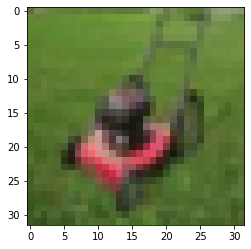

In [0]:
# Examine one of the images and its corresponding label
plt.imshow(train_image[500])
print(train_label[500])    # Labels are mapped with ID in given CIFAR dataset, So its required to load 'lable' with actual name-> Json format


In [0]:
# Load the list of labels from a JSON file

import json

with open('cifar100_fine_labels.json', 'r') as fine_labels:
    cifar100_fine_labels = json.load(fine_labels)

The list of labels for the CIFAR-100 dataset are available [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In [0]:
# Print a few of the labels
cifar100_fine_labels[0:10]


['apple',
 'aquarium_fish',
 'baby',
 'bear',
 'beaver',
 'bed',
 'bee',
 'beetle',
 'bicycle',
 'bottle']

In [0]:
# Print the corresponding label for the example above

cifar100_fine_labels[41]

'lawn_mower'

#### Load the data using different label modes

In [0]:
# Display a few examples from category 87 (index 86) and the list of labels

examples = train_image[(train_label.T == 87)[0]][:3]
fig, ax = plt.subplots(1,3)
ax[0].imshow(examples[0])
ax[1].imshow(examples[1])
ax[2].imshow(examples[2])

In [0]:
# Reload the data using the 'coarse' label mode

(train_images, train_labels),(test_images, test_labels)=cifar100.load_data(label_mode='coarse')

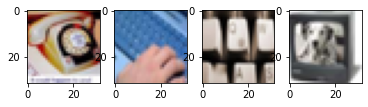

In [0]:
# Display three images from the dataset with the label 6 (index 5)

examples = train_images[(train_labels.T == 5)[0]][:4]
fig, ax = plt.subplots(1,4)
ax[0].imshow(examples[0])
ax[1].imshow(examples[1])
ax[2].imshow(examples[2])
ax[3].imshow(examples[3])

In [0]:
# Load the list of coarse labels from a JSON file

with open('cifar100_coarse_labels.json', 'r') as coarse_labels:
    cifar100_coarse_labels = json.load(coarse_labels)

In [0]:
# Print a few of the labels
cifar100_coarse_labels[0:10]

['aquatic mammals',
 'fish',
 'flowers',
 'food containers',
 'fruit and vegetables',
 'household electrical device',
 'household furniture',
 'insects',
 'large carnivores',
 'large man-made outdoor things']

In [0]:
# Print the corresponding label for the example above
print(cifar100_coarse_labels[5])
print(cifar100_fine_labels[87])


household electrical device
television


#### Load the IMDB Dataset

In [0]:
from tensorflow.keras.datasets import imdb

In [0]:
# Load the IMDB dataset
(train_data,train_label),(test_data, test_label)=imdb.load_data()


17465344/17464789 [==============================] - 0s 0us/step


In [0]:
# Print an example from the training dataset, along with its corresponding label
print(train_data[0])
print(train_labels[0])



[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
[11]


In [0]:
# Get the lengths of the input sequences

sequence_lengths = [len(seq) for seq in train_data]

In [0]:
# Determine the maximum and minimum sequence length

print(np.max(sequence_lengths))
print(np.min(sequence_lengths))

2494
11


#### Using Keyword Arguments

In [0]:
# Load the data ignoring the 50 most frequent words, use oov_char=2 (this is the default)

(train_data,train_label),(test_data,test_label)=imdb.load_data(skip_top=50,oov_char=2)
# skip_top -> Skip top 50 characters to reduce noise in dataset, OOV_char: Outofvalue character 

In [0]:
# Get the lengths of the input sequences

sequence_lengths = [len(seq) for seq in train_data]

In [0]:
# Determine the maximum and minimum sequence length

print(np.max(sequence_lengths))
print(np.min(sequence_lengths))


2494
11


In [0]:
# Define functions for filtering the sequences

def remove_oov_char(element):
    ''' Filter function for removing the oov_char. '''
    return [word for word in element if word!=2]

def filter_list(lst):
    ''' Run remove_oov_char on elements in a list. '''
    return [remove_oov_char(element) for element in lst]

In [0]:
# Remove the oov_char from the sequences using the filter_list function

train_data= filter_list(train_data)

In [0]:
# Get the lengths of the input sequences

sequence_lengths = [len(seq) for seq in train_data]

In [0]:
# Determine the maximum and minimum sequence length
print(np.max(sequence_lengths))
print(np.min(sequence_lengths))


1648
3
